In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./Github-Data/crypto_github_events.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172138 entries, 0 to 1172137
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   date     1172138 non-null  object
 1   actions  1172138 non-null  object
 2   userID   1172138 non-null  object
 3   repoID   1172138 non-null  object
dtypes: object(4)
memory usage: 35.8+ MB
None


In [7]:
# rank top 10 users, most actions
user_grp = df.groupby('userID')
top_ten_users = user_grp['actions'].count().sort_values(ascending=False).head(10)
print(top_ten_users)

userID
K3WbcDlZUBxBfx8Mv-twSg    15593
yhHGzBppxhIRhPkWapTLJQ    13211
8iDsKCYEfcL4jeGKxNtPQg    13203
Li47SClZy_BDxLTc0mN7bQ     9996
lAMqEaTXdyY-pgrNTEAFjw     8759
oVVUY8Nh5wNqJ0qLROKRkg     7994
-Tf7mnYl8kygw0ZctlhfOw     7714
Rttu6fe4U29LzyZ8zU9RIQ     7458
AIVdQMXja0fmjFk_ejf7ow     7397
Qyz97YBv9rf-V3QYWhkSbw     7366
Name: actions, dtype: int64


In [8]:
# set up for monthly volumes
df['dt'] = pd.to_datetime(df['date']).dt.strftime('%m/%Y')

In [9]:
time_period = pd.Series(
    pd.date_range("2015-01-01", periods=32, freq="MS")
).apply(lambda row: row.strftime('%m/%Y'))

monthly_actions_df = df.groupby(['userID', 'dt'])[
    'actions'].count().reset_index()
print(monthly_actions_df)

                        userID       dt  actions
0       ---JpGdgzlRLb4Al5cUGTA  07/2017        1
1       --25jmD0Md-xL1-bGXHCMA  07/2017        1
2       --6mzHIvjkAFrubSerIIhQ  01/2015       57
3       --6mzHIvjkAFrubSerIIhQ  01/2016       12
4       --6mzHIvjkAFrubSerIIhQ  02/2015       18
...                        ...      ...      ...
184031  zzrAxIeaf9anR4xl7selVQ  11/2015        1
184032  zzuqGNTTVf7E8MfKTeBX3g  07/2016        1
184033  zzwCoPKC0khlzCbWi_IMHA  07/2017        2
184034  zzwCoPKC0khlzCbWi_IMHA  08/2017        1
184035  zzyQvwm7P6mnedudTvx-Hw  10/2016        1

[184036 rows x 3 columns]


In [10]:
def update_monthly_volume(date):
    monthly_actions = monthly_actions_df[['userID', 'actions']][monthly_actions_df['dt'] == date]
    monthly_actions = monthly_actions.set_index('userID').rename({'actions': date}, axis=1)
    monthly_volume_df.update(monthly_actions)

monthly_volume_df = pd.DataFrame(
    0, columns=time_period, index=df['userID'].unique())
np.vectorize(lambda date: update_monthly_volume(date))(time_period)

monthly_volume_df.index.name = 'userID'
print(monthly_volume_df)

                        01/2015  02/2015  03/2015  04/2015  05/2015  06/2015  \
userID                                                                         
5Nmia2cw5HiUKpI4Y7QkdQ     35.0     11.0      0.0      3.0      2.0     54.0   
_DHICgWntHlPx4gWdGpnRQ      0.0      0.0     34.0      0.0      1.0      0.0   
YKzvufnF_N6khw7BOhE8hg      0.0      0.0      0.0      0.0      0.0      0.0   
HxIxl_gs5e--6UT_EHq8lw      0.0      0.0      0.0      0.0      0.0      0.0   
5oEbT1dj6KcoJuBz966PGg      0.0      0.0      0.0      0.0      0.0      0.0   
...                         ...      ...      ...      ...      ...      ...   
OEMwqXV03v5P-Tj6ddQjGA      0.0      1.0      0.0      0.0      0.0      0.0   
D_oktQK_m98_zagOWmu-SA      0.0      1.0      0.0      0.0      0.0      0.0   
vBAhgorJ8lCtdg88ABSgVA      0.0      2.0      0.0      0.0      0.0      0.0   
bcm8Vn2lzYQSVktN0dlIig      0.0      1.0      0.0      0.0      0.0      0.0   
7bScg5Bi1Q7ed5ezvKzMtA      0.0      1.0

In [11]:
# monthly volume of actions per user over time (for top 10)
top_ten_userIDs = top_ten_users.index
top_ten_mask = monthly_volume_df.index.isin(top_ten_userIDs)
top_ten_df = monthly_volume_df[top_ten_mask].reindex(top_ten_userIDs)

print(top_ten_df)

                        01/2015  02/2015  03/2015  04/2015  05/2015  06/2015  \
userID                                                                         
K3WbcDlZUBxBfx8Mv-twSg    526.0    290.0    411.0    338.0    557.0    645.0   
yhHGzBppxhIRhPkWapTLJQ    427.0    621.0    399.0    280.0    533.0     78.0   
8iDsKCYEfcL4jeGKxNtPQg      0.0      0.0      0.0      0.0      0.0      0.0   
Li47SClZy_BDxLTc0mN7bQ    603.0    557.0    395.0    348.0    382.0    581.0   
lAMqEaTXdyY-pgrNTEAFjw      0.0      0.0      0.0      0.0      0.0      0.0   
oVVUY8Nh5wNqJ0qLROKRkg     71.0    240.0    232.0    273.0    292.0    258.0   
-Tf7mnYl8kygw0ZctlhfOw      0.0      5.0      1.0      1.0      4.0      0.0   
Rttu6fe4U29LzyZ8zU9RIQ    348.0    309.0    251.0    222.0    273.0    339.0   
AIVdQMXja0fmjFk_ejf7ow    114.0    105.0    172.0    280.0     83.0    134.0   
Qyz97YBv9rf-V3QYWhkSbw      0.0      0.0      0.0      0.0      0.0      0.0   

                        07/2015  08/201

In [12]:
top_ten_df.to_csv('out_github.csv')

In [13]:
# monthly volume of actions per user in 2016
monthly_volume_2016_df = monthly_volume_df.loc[:, '01/2016':'12/2016']
print(monthly_volume_2016_df)

                        01/2016  02/2016  03/2016  04/2016  05/2016  06/2016  \
userID                                                                         
5Nmia2cw5HiUKpI4Y7QkdQ     24.0     11.0      3.0      1.0     15.0      6.0   
_DHICgWntHlPx4gWdGpnRQ      3.0      0.0      0.0      0.0      0.0      0.0   
YKzvufnF_N6khw7BOhE8hg      0.0      0.0      0.0      0.0      0.0      0.0   
HxIxl_gs5e--6UT_EHq8lw      0.0      0.0      0.0      0.0      0.0      0.0   
5oEbT1dj6KcoJuBz966PGg      0.0      1.0      0.0      0.0      0.0      0.0   
...                         ...      ...      ...      ...      ...      ...   
OEMwqXV03v5P-Tj6ddQjGA      0.0      0.0      0.0      0.0      0.0      0.0   
D_oktQK_m98_zagOWmu-SA      0.0      0.0      0.0      0.0      0.0      0.0   
vBAhgorJ8lCtdg88ABSgVA      0.0      0.0      0.0      0.0      0.0      0.0   
bcm8Vn2lzYQSVktN0dlIig      0.0      0.0      0.0      0.0      0.0      0.0   
7bScg5Bi1Q7ed5ezvKzMtA      0.0      0.0

In [14]:
top_five_2016_userIDs = monthly_volume_2016_df.sum(axis=1).sort_values(ascending=False).head(5).index
top_five_mask = monthly_volume_2016_df.index.isin(top_five_2016_userIDs)
top_five_2016_df = monthly_volume_2016_df[top_five_mask].reindex(index=top_five_2016_userIDs).reset_index()

print(top_five_2016_df)

                   userID  01/2016  02/2016  03/2016  04/2016  05/2016  \
0  8iDsKCYEfcL4jeGKxNtPQg     78.0   1292.0    745.0    738.0   1183.0   
1  K3WbcDlZUBxBfx8Mv-twSg    395.0    600.0    645.0    721.0    370.0   
2  -Tf7mnYl8kygw0ZctlhfOw    100.0    468.0    357.0    195.0    522.0   
3  M5f7BOOVxgnr-XdzMo8bGQ    523.0    196.0    402.0    429.0    285.0   
4  yhHGzBppxhIRhPkWapTLJQ    125.0    365.0    294.0    336.0    508.0   

   06/2016  07/2016  08/2016  09/2016  10/2016  11/2016  12/2016  
0    731.0    888.0   1188.0   1090.0    719.0    755.0    550.0  
1    648.0    344.0    424.0    718.0    410.0    474.0    322.0  
2    393.0    442.0    597.0    634.0    508.0    709.0    694.0  
3    379.0    257.0    412.0    461.0    234.0    261.0    261.0  
4    265.0    159.0    311.0    570.0    417.0    349.0    358.0  


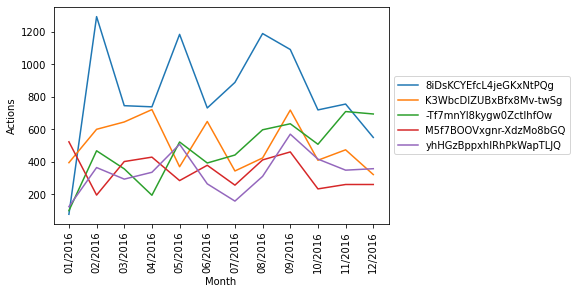

In [15]:
top_five_2016_df.apply(lambda row: plt.plot(
    row.index[1:].to_list(), row.values[1:], label=row.values[0]), axis=1)
   
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Actions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()